# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [51]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [52]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [53]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [54]:
data.tail()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
4865,b,99,3,2,1,0,0,0,1,313,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Private
4866,a,99b,4,4,6,0,0,0,0,285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,
4867,a,99b,4,6,8,0,1,0,0,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,
4868,a,99b,4,4,2,0,1,1,0,267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,
4869,a,99b,4,3,7,0,0,0,1,274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,


In [55]:
#Find out the columns types
data.dtypes

id                     object
ad                     object
education                int8
ofjobs                   int8
yearsexp                 int8
honors                   int8
volunteer                int8
military                 int8
empholes                 int8
occupspecific           int16
occupbroad               int8
workinschool             int8
email                    int8
computerskills           int8
specialskills            int8
firstname              object
sex                    object
race                   object
h                     float32
l                     float32
call                  float32
city                   object
kind                   object
adid                  float32
fracblack             float32
fracwhite             float32
lmedhhinc             float32
fracdropout           float32
fraccolp              float32
linc                  float32
                       ...   
parent_emp            float32
branch_sales          float32
branch_emp

In [6]:
# print the mean, min,max,and std
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Print the set information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [8]:
#Count the colmuns
data.count()

id                    4870
ad                    4870
education             4870
ofjobs                4870
yearsexp              4870
honors                4870
volunteer             4870
military              4870
empholes              4870
occupspecific         4870
occupbroad            4870
workinschool          4870
email                 4870
computerskills        4870
specialskills         4870
firstname             4870
sex                   4870
race                  4870
h                     4870
l                     4870
call                  4870
city                  4870
kind                  4870
adid                  4870
fracblack             4784
fracwhite             4784
lmedhhinc             4784
fracdropout           4784
fraccolp              4784
linc                  4784
                      ... 
parent_emp            1722
branch_sales           608
branch_emp             658
fed                   3102
fracblack_empzip      1918
fracwhite_empzip      1918
l

In [9]:
#Exploring the columns
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [56]:
#Find out missing values and their percentage per column
data.isnull().sum()/data.count()[0]

id                    0.000000
ad                    0.000000
education             0.000000
ofjobs                0.000000
yearsexp              0.000000
honors                0.000000
volunteer             0.000000
military              0.000000
empholes              0.000000
occupspecific         0.000000
occupbroad            0.000000
workinschool          0.000000
email                 0.000000
computerskills        0.000000
specialskills         0.000000
firstname             0.000000
sex                   0.000000
race                  0.000000
h                     0.000000
l                     0.000000
call                  0.000000
city                  0.000000
kind                  0.000000
adid                  0.000000
fracblack             0.017659
fracwhite             0.017659
lmedhhinc             0.017659
fracdropout           0.017659
fraccolp              0.017659
linc                  0.017659
                        ...   
parent_emp            0.646407
branch_s

In [57]:
#Dropp missing values
cl_data=data.dropna()
cl_data

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
5,b,1,4,2,6,1,0,0,0,266,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
6,b,1,4,2,5,0,1,0,0,13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
7,b,1,3,4,21,0,1,0,1,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
8,b,1,4,3,3,0,0,0,0,316,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
9,b,1,4,2,6,0,1,0,0,263,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
10,b,1,4,4,8,0,1,0,1,379,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
11,b,1,4,4,8,0,0,0,0,316,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
35,b,1,3,3,5,0,1,0,0,379,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Private
36,b,1,4,3,4,0,0,0,1,313,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Private


In [58]:
#Groupby by race
call_by_race = pd.DataFrame(data.groupby(["race"])["call"].sum())
call_by_race

,call
race,
b,157.0
w,235.0


In [59]:
#Groupby by sex = pd.DataFrame(data.groupby(["sex"])["call"].sum())
call_by_sex

,call
sex,
f,309.0
m,83.0


In [60]:
#Groupby by race and sex
call_by_sex_n_race = pd.DataFrame(data.groupby(["race", "sex"])["call"].sum())
call_by_sex_n_race

call
race sex       
b    f    125.0
     m     32.0
w    f    184.0
     m     51.0

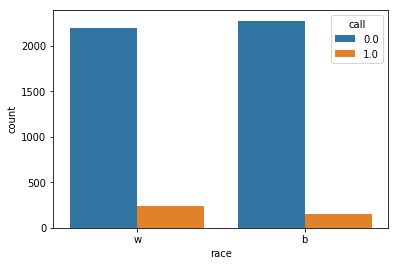

In [61]:
 # countplot of callbacks for black & white-sounding names
sns.countplot(x=data.race, hue=data.call)

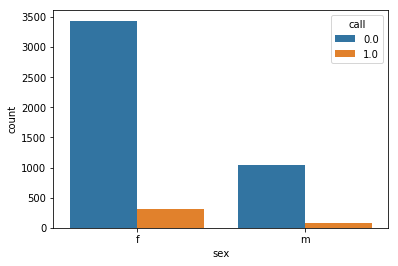

In [62]:
 # countplot of callbacks fby sex
sns.countplot(x=data.sex, hue=data.call)

In [63]:
b = data[data['race'] == 'b']
b_array = np.array(b["call"])
b_array

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [64]:
w = data[data['race'] == 'w']
w_array = np.array(w["call"])
w_array

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [70]:
print('Mean of the discrimination for the black sample:', np.mean(b_array))
print('Mean of the discrimination for the white sample:', np.mean(w_array))


Mean of the discrimination for the black sample: 0.064476386
Mean of the discrimination for the white sample: 0.09650924


In [68]:
#Question3: Using the boostrap approach:

#Call the draw function resps
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates



def bootstrap_replicate_1d(temp_array, func):
    return func(np.random.choice(temp_array, size=len(temp_array)))

# Bootstrap approach:
bs= np.random.choice(b_array,10000)
bs_means= draw_bs_reps(bs,np.mean,10000)
bs_std= draw_bs_reps(bs,np.std,10000)
bs_std_mean=np.mean(bs_std)
bs_interv_95= np.percentile(bs_means,[2.5,97.5])
print("95% confidence interval: ", bs_interv_95 )
print('Race descrimination at:', bs_interv_95[0]-bs_std_mean*2, 'and below with a std of 2')
print('Race descrimination at:', bs_interv_95[1]+bs_std_mean*2, 'and above with a std of 2')

95% confidence interval:  [0.0594 0.069 ]
Race descrimination at: -0.43023389266431333 and below with a std of 2
Race descrimination at: 0.5586338906139136 and above with a std of 2


In [69]:
#we can again use a t-test as we are comparing the means from two samples

print('Mean of the discrimination for the black sample: ', np.mean(b_array))
print('Mean of the discrimination for the white sample: ', np.mean(w_array))

race_ttest, race_pv = stats.ttest_ind(a=b_array, b=w_array, equal_var=False)
print('The T-test is %d with a p-value of %s' %(abs(race_ttest), race_pv))

Mean of the discrimination for the black sample:  0.064476386
Mean of the discrimination for the white sample:  0.09650924
The T-test is 4 with a p-value of 3.942941513645935e-05
